In [1]:
%matplotlib inline
import numpy as np
import scipy.misc as misc
import matplotlib as matplotlib
import matplotlib.pyplot as plt
from scipy.integrate import quad
import cosmology as cosmo
import scipy.interpolate as interp
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
print cosmo.__file__
littleh=0.68

cosmology.pyc


/Users/aaronew/default/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


All of the Params we are looking at

In [2]:
params=np.array(['HII_EFF_FACTOR','R_BUBBLE_MAX','X_RAY_Tvir_MIN','ZETA_X','NU_X_THRESH','X_RAY_SPEC_INDEX'])
labels={params[0]:'$\\zeta$',params[1]:'$R_{mfp}$',params[2]:'$T_{vir}^{min}$',params[3]:'$f_X$',params[4]:'$\\nu_{min}$',params[5]:'$\\alpha_X$'}
labelsMath={params[0]:'\\zeta',params[1]:'R_{mfp}',params[2]:'T_{vir}^{min}',params[3]:'f_X',params[4]:'\\nu_{min}',params[5]:'\\alpha_X'}

In [7]:
default_path='../data/DEFAULT/'
largedelay_path='../data/LARGEDELAY/'
foregrounds='mod'
#Load up w-Terms
wFile1ListMod={}
wFile2ListMod={}
wFile1ListLDMod={}
wFile2ListLDMod={}

for param in params:
    wFile1=np.load(default_path+param+'_DEFAULT_Output/data/wMatrix1_'+param+'_hera331_'+foregrounds+'_drift.npz')
    wFile2=np.load(default_path+param+'_DEFAULT_Output/data/wMatrix2_'+param+'_hera331_'+foregrounds+'_drift.npz')
    wFile1ListMod[param]=wFile1
    wFile2ListMod[param]=wFile2
    wFile1=np.load(largedelay_path+param+'_LARGEDELAY_Output/data/wMatrix1_'+param+'_hera331_'+foregrounds+'_drift.npz')
    wFile2=np.load(largedelay_path+param+'_LARGEDELAY_Output/data/wMatrix2_'+param+'_hera331_'+foregrounds+'_drift.npz')
    wFile1ListLDMod[param]=wFile1
    wFile2ListLDMod[param]=wFile2
    

First check the noise curves

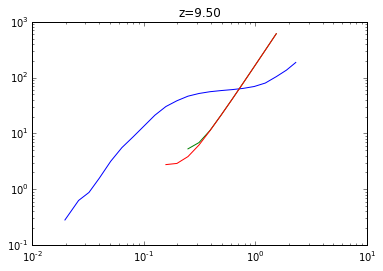

In [9]:
zAxis=wFile1ListMod['ZETA_X']['zAxis']
kAxis=wFile1ListMod['ZETA_X']['kAxis']
psMat=np.zeros((len(zAxis),len(kAxis)))
kMat=np.zeros((len(zAxis),len(kAxis)))
for mm in range(len(zAxis)):
    ps=np.loadtxt(default_path+'ZETA_X_DEFAULT_Output/data/ps_ZETA_X_step5_z%.2f.txt'%(zAxis[mm]))
    psMat[mm,:]=ps[:,1]
    kMat[mm,:]=ps[:,0]
mm=10
ps=np.loadtxt(default_path+'ZETA_X_DEFAULT_Output/data/ps_ZETA_X_step0_z%.2f.txt'%(zAxis[mm]))
plt.close()
plt.plot(ps[:,0],ps[:,1])
plt.plot(kAxis,wFile1ListLDMod['HII_EFF_FACTOR']['errMat'][mm,:])
plt.plot(kAxis,wFile1ListMod['HII_EFF_FACTOR']['errMat'][mm,:])

#print wFile1ListMod['ZETA_X']['errMat'][mm,:]
#print wFile1ListLDMod['ZETA_X']['errMat'][mm,:]
plt.yscale('log')
plt.xscale('log')
plt.title('z=%.2f'%(zAxis[mm]))

NameError: name 'wFile1List127Mod' is not defined

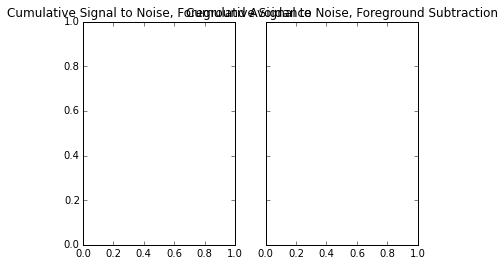

In [10]:
mm=10
littleh=.68
fig,axarr=plt.subplots(1,2,sharex=True,sharey=True)
#plt.title('k=%.2f h/Mpc'%(kAxis[mm]/littleh))
#axarr[0].step(zAxis,wFile1List['ZETA_X']['errMat'][:,mm])
#axarr[0].step(zAxis,wFile1List127['ZETA_X']['errMat'][:,mm])
#axarr[0].step(zAxis,wFile1ListSKA['ZETA_X']['errMat'][:,mm])

#kInd=np.where(np.abs(kMat[0,:]/littleh-kAxis[mm]).min()==np.abs(kMat[16,:]/littleh-kAxis[mm]))
#axarr[0].plot(zAxis,psMat[:,kInd[0][0]],'-k')
#axarr[0].set_yscale('log')
#axarr[0].set_ylim(1e-1,1e4)
#axarr[1].set_title('k=%.2f h/Mpc'%(kAxis[mm]/littleh))
#axarr[0].set_title('k=%.2f h/Mpc'%(kAxis[mm]/littleh))
axarr[0].set_title('Cumulative Signal to Noise, Foreground Avoidance')
axarr[1].set_title('Cumulative Signal to Noise, Foreground Subtraction')

#axarr[1].set_title('k=%.2f h/Mpc'%(kAxis[mm]/littleh))


eList=wFile1ListMod['ZETA_X']['errMat']
eList127=wFile1List1Mod['ZETA_X']['errMat']
eListSKA=wFile1List1LDMod['ZETA_X']['errMat']
eList[np.isnan(eList)]=np.inf
eList127[np.isnan(eList127)]=np.inf
eListSKA[np.isnan(eListSKA)]=np.inf

psMat[np.isnan(psMat)]=0.



noiseVec=1./np.sqrt(np.sum(1./eList**2.,axis=1))
avgVec=np.sum(psMat/eList**2.,axis=1)/np.sum(1./eList**2.,axis=1)
axarr[0].step(zAxis,avgVec/noiseVec,label='HERA-331')
print np.isnan(eListSKA)
noiseVec=1./np.sqrt(np.sum(1./eListSKA**2.,axis=1))
avgVec=np.sum(psMat/eListSKA**2.,axis=1)/np.sum(1./eListSKA**2.,axis=1)
axarr[0].step(zAxis,avgVec/noiseVec,label='SKA')
noiseVec=1./np.sqrt(np.sum(1./eList127**2.,axis=1))
avgVec=np.sum(psMat/eList127**2.,axis=1)/np.sum(1./eList127**2.,axis=1)
axarr[0].step(zAxis,avgVec/noiseVec,label='HERA-127')
axarr[0].set_yscale('log')
axarr[0].set_ylim(1e0,2e2)


eList=wFile1ListOpt['ZETA_X']['errMat']
eList127=wFile1List127Opt['ZETA_X']['errMat']
eListSKA=wFile1ListSKAOpt['ZETA_X']['errMat']
eList[np.isnan(eList)]=np.inf
eList127[np.isnan(eList127)]=np.inf
eListSKA[np.isnan(eListSKA)]=np.inf

noiseVec=1./np.sqrt(np.sum(1./eList**2.,axis=1))
avgVec=np.sum(psMat/eList**2.,axis=1)/np.sum(1./eList**2.,axis=1)
l1=axarr[1].step(zAxis,avgVec/noiseVec,label='HERA-331')
print np.isnan(eListSKA)
noiseVec=1./np.sqrt(np.sum(1./eListSKA**2.,axis=1))
avgVec=np.sum(psMat/eListSKA**2.,axis=1)/np.sum(1./eListSKA**2.,axis=1)
l2=axarr[1].step(zAxis,avgVec/noiseVec,label='SKA')
noiseVec=1./np.sqrt(np.sum(1./eList127**2.,axis=1))
avgVec=np.sum(psMat/eList127**2.,axis=1)/np.sum(1./eList127**2.,axis=1)
l3=axarr[1].step(zAxis,avgVec/noiseVec,label='HERA-127')
axarr[1].set_yscale('log')
axarr[1].set_ylim(1e0,2e2)

kInd=np.where(np.abs(kMat[0,:]/littleh-kAxis[mm]).min()==np.abs(kMat[16,:]/littleh-kAxis[mm]))
#axarr[1].step(zAxis,psMat[:,kInd[0][0]]/wFile1List['ZETA_X']['errMat'][:,mm],label='HERA-331')
#axarr[1].step(zAxis,psMat[:,kInd[0][0]]/wFile1List127['ZETA_X']['errMat'][:,mm],label='HERA-127')
#axarr[1].step(zAxis,psMat[:,kInd[0][0]]/wFile1ListSKA['ZETA_X']['errMat'][:,mm],label='SKA')
fig.legend( (l1[0],l2[0],l3[0]), ('HERA-331','SKA-1 LOW','HERA-127'), loc = 'lower center', ncol=5, labelspacing=0. )

axarr[0].set_xlabel('z')
axarr[0].set_ylabel('SNR')
#axarr[0].legend(loc='best')
axarr[1].set_xlabel('z')
#axarr[0].set_ylabel('$\\Delta^2(k)$')
plt.gcf().set_size_inches([12,5])

#plt.savefig('paper/figures/snr.pdf',bbox_inches='tight')

In [ ]:
#show multiple power spectra as a function of redshift
#show the sensitivity as a function of redshift for a few fixed k modes. 
fig=plt.figure()
print zAxis
zStep=5
llist=[]
labellist=[]
ax=plt.subplot2grid((1,11),(0,0),colspan=11)
for mm in range(5,30,zStep):
    line=ax.plot(kAxis,psMat[mm,:],'-o',markersize=5)
    llist.append(line[0])
    labellist.append('z=%.2f'%(zAxis[mm]))
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(2e-2,2e0)
ax.set_ylim(1e0,1e4)

plt.ylabel('$\Delta^2(k)$ (mK$^2$)',fontsize=16)
plt.xlabel('$k$ ($h$Mpc$^{-1}$)',fontsize=16)
ax.legend(llist,labellist,'lower right')#,bbox_to_anchor=[.88,.5])
plt.savefig('paper/figures/pVsK.pdf',bbox_inches='tight')

In [ ]:
#show the sensitivity as a function of redshift for a few fixed k modes. 
eList=wFile1ListMod['ZETA_X']['errMat']
eList127=wFile1List127Mod['ZETA_X']['errMat']
eListSKA=wFile1ListSKAMod['ZETA_X']['errMat']
eList[np.isnan(eList)]=np.inf
eList127[np.isnan(eList127)]=np.inf
eListSKA[np.isnan(eListSKA)]=np.inf



indMat=[10,12,14]
fig=plt.figure()
zErr=np.append(zAxis[1:],zAxis[-1]+.5)
eList127[np.isinf(eList127)]=9e99
eList[np.isinf(eList)]=9e99
eListSKA[np.isinf(eListSKA)]=9e99
axarr=[plt.subplot2grid((9,3),(0,mm),rowspan=8) for mm in range(3)]
mycm=plt.get_cmap('cool')

for mm in range(3):
    l0=axarr[mm].plot(zAxis,psMat[:,indMat[mm]],'-k',lw=2)[0]
    axarr[mm].set_yscale('log')
    axarr[mm].set_ylim(2e-0,1e4)
    l1=axarr[mm].step(zErr,eList127[:,indMat[mm]],color=mycm(.25),lw=1)[0]
    l2=axarr[mm].step(zErr,eListSKA[:,indMat[mm]],color=mycm(.5),lw=1)[0]
    l3=axarr[mm].step(zErr,eList[:,indMat[mm]],color=mycm(.75),lw=1)[0]
    axarr[mm].set_title('$k$=%.2f $h$Mpc$^{-1}$'%(kAxis[indMat[mm]]),fontsize=16)
    axarr[mm].tick_params(axis='x',labelsize=14)
    axarr[mm].tick_params(axis='y',labelsize=14)
axarr[1].set_xlabel('redshift',fontsize=16)
axarr[1].set_yticklabels(['' for mm in range(len(axarr[1].get_yticklabels()))])
axarr[2].set_yticklabels(['' for mm in range(len(axarr[2].get_yticklabels()))])


axarr[0].set_ylabel('$\Delta^2(k)$(mK$^2$)',fontsize=16)
fig.legend((l0,l1,l2,l3),('Fiducial Signal','HERA-127','SKA-1','HERA-331'),loc='lower center',ncol=4)
fig.set_size_inches([18,6])
plt.savefig('paper/figures/pVsZ.pdf',bbox_inches='tight')

In [ ]:
fig,ax=plt.subplots(1,2,sharey=True)
mm=10
ax[0].set_title('k=%.2f h/Mpc'%(kAxis[mm]))
kInd=np.where(np.abs(kMat[0,:]/littleh-kAxis[mm]).min()==np.abs(kMat[16,:]/littleh-kAxis[mm]))
ax[0].step(zAxis,psMat[:,kInd[0][0]]/wFile1ListMod['ZETA_X']['errMat'][:,mm],label='HERA-331')
ax[0].step(zAxis,psMat[:,kInd[0][0]]/wFile1List127Mod['ZETA_X']['errMat'][:,mm],label='HERA-127')
ax[0].step(zAxis,psMat[:,kInd[0][0]]/wFile1ListSKAMod['ZETA_X']['errMat'][:,mm],label='SKA')


ax[1].set_title('k=%.2f h/Mpc'%(kAxis[mm]))
kInd=np.where(np.abs(kMat[0,:]/littleh-kAxis[mm]).min()==np.abs(kMat[16,:]/littleh-kAxis[mm]))
l1=ax[1].step(zAxis,psMat[:,kInd[0][0]]/wFile1ListOpt['ZETA_X']['errMat'][:,mm],label='HERA-331')[0]
l2=ax[1].step(zAxis,psMat[:,kInd[0][0]]/wFile1List127Opt['ZETA_X']['errMat'][:,mm],label='HERA-127')[0]
l3=ax[1].step(zAxis,psMat[:,kInd[0][0]]/wFile1ListSKAOpt['ZETA_X']['errMat'][:,mm],label='SKA')[0]


plt.xlabel('z')
plt.ylabel('SNR')
plt.legend(loc='best')
fig.legend( (l1,l2,l3), ('HERA-331','HERA-127','SKA'), loc = 'lower center', ncol=5, labelspacing=0. )
fig.set_size_inches([12,5])
plt.savefig('paper/figures/snr.pdf',bbox_inches='tight')
#plt.plot(zAxis,psMat[:,kInd[0][0]])
#plt.yscale('log')
#plt.ylim(1e-1,1e4)

Now lets plot the wTerms for reionization and heating parameters

In [ ]:
#create plot by interpolating ymin points
def logPlotPM(xList,yList,yMin=1e-3,yMax=1e1):
    fig=plt.figure()
    axNeg=fig.add_axes([.1,.1,.8,.4])
    axPos=fig.add_axes([.1,.5,.8,.4])
    for mm in range(len(yList)):
       # print mm
        y=yList[mm]
        x=xList[mm]
        x=x[np.abs(y)>0.]
        y=y[np.abs(y)>0.]
       # print y
        tList=[]
        #find cross over points where y switches sign
        ySgn=np.sign(y[0])
        ySets=[[],[]]
        xSets=[[],[]]
        parity=0
        sign0=np.sign(y[0])
        sign1=-np.sign(y[0])
        signs=[sign0,sign1]
        xSets[parity].append(x[0])
        ySets[parity].append(y[0])
        for nn in range(1,len(x)):
            if(not(np.sign(y[nn])==ySgn)):
                #append transition point before parity switch
                xSets[parity].append(x[nn])
                ySets[parity].append(yMin)
                #switch parity
                if(parity==0):
                    parity=1
                else:
                    parity=0
                ySgn=np.sign(y[nn])
                #and after parity switch
                ySets[parity].append(yMin)
                xSets[parity].append(x[nn])
            xSets[parity].append(x[nn])
            ySets[parity].append(signs[parity]*y[nn])   
        #plot positive values on top
        #print xSets
        #print ySets
        if(sign0==1):
            axPos.plot(xSets[0],ySets[0])
            axNeg.plot(xSets[1],ySets[1])
        else:
            axPos.plot(xSets[1],ySets[1])
            axNeg.plot(xSets[0],ySets[0])
    xLimPos=axPos.get_xlim()
    xLimNeg=axNeg.get_xlim()
    xLims=[np.min([xLimPos[0],xLimNeg[0]]),np.max([xLimPos[1],xLimNeg[1]])]
    axPos.set_xlim(xLims)
    axNeg.set_xlim(xLims)
    axPos.set_ylim(yMin,yMax)
    axNeg.set_ylim(yMin,yMax)
    axPos.set_xticks([])
    axPos.set_yscale('log')
    axNeg.set_yscale('log')
    axNeg.invert_yaxis()
    

            
            
        

The plots I want to make: w versus z, compare w for two different arrays, two different k values, and two different w matrices

Here is a comparison with all k values

In [ ]:
fig,axarr=plt.subplots(2,3,sharex=True,sharey=True)
lw=2
lines=[0,0,0,0]
llabels=[0,0,0,0]
for ii in range(3):
    for jj in range(2):
        mm=jj*3+ii
        param=params[mm]
        lss=['--',':','-.','-']
        lnum=0
        for kInd in [10,12,14]:
            lines[lnum]=axarr[jj][ii].plot(wFile1List127Mod[param]['zAxis'],wFile1List127Mod[param]['wMat'][:,kInd].squeeze(),ls=lss[lnum],lw=lw)[0]
            llabels[lnum]='k=%.2f hMpc$^{-1}$'%(kAxis[kInd])
            lnum+=1
        axarr[jj][ii].set_title('$\\theta_i$=%s'%(labels[param]),fontsize=16)
        axarr[jj][ii].set_ylim(-15,15)

print lines
print llabels
fig.legend( tuple(lines), tuple(llabels), loc = 'lower center', ncol=5, labelspacing=0. )
#plt.legend(loc='best')
plt.gcf().set_size_inches([15,8])
axarr[0][0].set_ylabel('$w_i(k,z)$',fontsize=16)
axarr[1][0].set_ylabel('$w_i(k,z)$',fontsize=16)
axarr[1][0].set_xlabel('$z$',fontsize=16)
axarr[1][1].set_xlabel('$z$',fontsize=16)
axarr[1][2].set_xlabel('$z$',fontsize=16)
plt.savefig('paper/figures/wCompareVk_hera127.pdf')

In [ ]:
fig,axarr=plt.subplots(2,3,sharex=True,sharey=True)
lw=2
lines=[0,0,0,0]
llabels=[0,0,0,0]
colors=['y','orange','r','k']
for ii in range(3):
    for jj in range(2):
        mm=jj*3+ii
        param=params[mm]
        lss=['-','-','-','-']
        lnum=0
        for kInd in [10,12,13,14]:
            lines[lnum]=axarr[jj][ii].step(np.hstack([wFile1ListMod[param]['zAxis'],wFile1ListMod[param]['zAxis'][-1]+.5])[1:],wFile1ListMod[param]['wMat'][:,kInd].squeeze(),ls=lss[lnum],lw=lw,color=colors[lnum])[0]
            llabels[lnum]='k=%.2f hMpc$^{-1}$'%(kAxis[kInd])
            lnum+=1
        axarr[jj][ii].set_title('%s'%(labels[param]),fontsize=22,y=1.02)
        axarr[jj][ii].set_ylim(-25,25)
        axarr[jj][ii].set_xlim(5,25)
        #axarr[jj][ii].grid()
        axarr[jj][ii].tick_params('x',labelsize=16)
        axarr[jj][ii].tick_params('y',labelsize=16)
        lp1=axarr[jj][ii].axvline(8.5,color='k',ls='-')
        lp2=axarr[jj][ii].axvline(15.5,color='k',ls='--')
        lp3=axarr[jj][ii].axvline(21.5,color='k',ls=':')
        
print lines
print llabels
llabels1=[]
lines1=[]
llabels1.append('$z$ of reionization peak')
llabels1.append('$z$ of heating peak')
llabels1.append('$z$ of Ly-$\\alpha$ peak')
lines1.append(lp1)
lines1.append(lp2)
lines1.append(lp3)
#axarr[1][2].legend((lp1,lp2,lp3),('reionization peak','heating peak','Ly-$\\alpha$ peak'),loc='lower center',fontsize=14)
lgd=fig.legend( tuple(lines), tuple(llabels), loc = 'lower center', ncol=4, fontsize=16, labelspacing=0.,bbox_to_anchor=(.56,.05))
lgd.draw_frame(False)
lgd=fig.legend( tuple(lines1), tuple(llabels1), loc = 'lower center', ncol=4, fontsize=16, labelspacing=0.,bbox_to_anchor=(.56,-.01))
lgd.draw_frame(False)
#plt.legend(loc='best')
axarr[0][0].set_ylabel('$w_i(k,z)$',fontsize=20)
axarr[1][0].set_ylabel('$w_i(k,z)$',fontsize=20)
axarr[1][0].set_xlabel('$z$',fontsize=24)
axarr[1][1].set_xlabel('$z$',fontsize=24)
axarr[1][2].set_xlabel('$z$',fontsize=24)
fig.subplots_adjust(left=0.01, bottom=0.2, top=0.99, right=0.99)
plt.gcf().set_size_inches([15,8])
plt.savefig('paper/figures/wCompareVk.pdf',bbox_extra_artists=(lgd,),bbox_inches='tight')

many params for same k. 

In [ ]:
kInd=10
xList=[]
yList=[]
#plt.plot(zAxis,wFile1List[params[0]]['wMat'][:,kInd].squeeze(),'bo')
plt.title('k=%.2fhMpc$^{-1}$'%(kAxis[kInd]),fontsize=16)
lss=['-','--',':']
lws=[1,2]
colors=[]
cm1=plt.get_cmap('cool')
cm2=plt.get_cmap('hot')
cm=plt.get_cmap('jet')
#for mm in range(6):
#    colors.append(cm(.8*(mm+1.)/6.))
mm=0
for param in params:
    print param
    print labels[param]
    ls=lss[int(np.mod(mm,3))]
    ls='-'
    lw=lws[int(np.mod(mm,2))]
    #lw=2
    if (mm<3):
        tcolor=cm1(mm*.33*.8)
    else:
        tcolor=cm2((mm-3)*.33*.8)
    print tcolor
    #tcolor=cm(mm*1./6.*.5+.0)
    plt.step(wFile1ListMod[param]['zAxis'],wFile1ListMod[param]['wMat'][:,kInd].squeeze(),label=labels[param],ls=ls,lw=lw)#,color=tcolor)
    #print line.squeeze()
    mm+=1
    #print zAxis.shape
#print yList
plt.legend(loc='right',fontsize=20)
plt.gcf().set_size_inches([10,5])
plt.ylim(-30,30)
plt.xlim(4.5,25)
plt.ylabel('$w_i(k,z)$',fontsize=20)
plt.xlabel('$z$',fontsize=20)
plt.tick_params('x',labelsize=16)
plt.tick_params('y',labelsize=16)
plt.grid(True)
plt.savefig('paper/figures/wCompare.pdf',bbox_inches='tight')

In [ ]:
kInd=10
xList=[]
yList=[]
#plt.plot(zAxis,wFile1List[params[0]]['wMat'][:,kInd].squeeze(),'bo')
plt.title('k=%.2fhMpc$^{-1}$'%(kAxis[kInd]),fontsize=16)
lss=['-','--',':']
lws=[1,2]
colors=[]
cm=plt.get_cmap('gnuplot2')


for mm in range(6):
    colors.append(cm(.8*(mm+1.)/6.))
mm=0
for param in params:
    print param
    print labels[param]
    ls=lss[int(np.mod(mm,3))]
    ls='-'
    lw=lws[int(np.mod(mm,2))]
    #lw=2
    plt.step(wFile1ListMod[param]['zAxis'],wFile1ListMod[param]['wMat'][:,kInd].squeeze(),label=labels[param],ls=ls,lw=lw,color=colors[mm])
    #print line.squeeze()
    mm+=1
    #print zAxis.shape
#print yList
plt.legend(loc='right',fontsize=20)
plt.gcf().set_size_inches([10,5])
plt.ylim(-30,30)
plt.xlim(4.5,25)
plt.ylabel('$\\partial \\Delta^2(k,z)/\\partial \\theta_i$',fontsize=20)
plt.xlabel('z',fontsize=20)
plt.tick_params('x',labelsize=14)
plt.tick_params('y',labelsize=14)
plt.grid(True)
plt.savefig('paper/figures/wCompare_Poster.pdf',bbox_inches='tight')

In [ ]:
kInd=9
xList=[]
yList=[]
#plt.plot(zAxis,wFile1List[params[0]]['wMat'][:,kInd].squeeze(),'bo')
plt.title('k=%.2fhMpc$^{-1}$'%(kAxis[kInd]),fontsize=16)
lss=['-','--',':']
lws=[1,2]
mm=0
paramsTemp=['ZETA_X','R_BUBBLE_MAX']
for param in paramsTemp:
    print param
    print labels[param]
    ls=lss[int(np.mod(mm,3))]
    lw=2
    plt.step(wFile1ListMod[param]['zAxis'],wFile1ListMod[param]['wMat'][:,kInd].squeeze(),label=labels[param]+', HERA-331',ls=ls,lw=lw)
    lw=1
    plt.step(wFile1List127Mod[param]['zAxis'],wFile1List127Mod[param]['wMat'][:,kInd].squeeze(),label=labels[param]+', HERA-127',ls=ls,lw=lw)

    #print line.squeeze()
    mm+=1
    #print zAxis.shape
#print yList
plt.legend(loc='best')
plt.gcf().set_size_inches([10,5])
plt.ylim(-30,30)
plt.ylabel('$w_i(k,z)$',fontsize=16)
plt.xlabel('z')
plt.xlim(4.5,25)
plt.savefig('paper/figures/wCompareArrays.pdf')

Here is a function to compute the covariance matrix from a series of wLists


In [ ]:
bandInfo=np.loadtxt('ZETA_X_Output/bandInfo.txt')
print bandInfo

In [23]:
def computeCov(wList):
    nParams=len(wList)
    fisherMat=np.zeros((nParams,nParams))
#    print 'wList=%s'%wList
    for ii in range(nParams):
        wList[ii][np.logical_or(np.isnan(wList[ii]),np.isinf(wList[ii]))]=0.#all nans set to zero. (where do they come from?)
        for jj in range(ii+1):
#            print 'product = %.2e'%(np.sum((wList[ii]*wList[jj]).flatten()))
            fisherMat[ii,jj]=np.sum((wList[ii]*wList[jj]).flatten())
            fisherMat[jj,ii]=fisherMat[ii,jj]
    #invert fisherMat to get covariance matrix
#    print 'fisher=%s'%(fisherMat)
   # print fisherMat
    try:
        covMat=np.linalg.inv(fisherMat)
    except:
        print 'singular'
        covMat=np.ones(fisherMat.shape)*9e99
    #print covMat
    return covMat

#compute the independent covariance matrices 
#scen is a string describing whether we are talking about the optimistic, moderat, or pessimistic foreground model. 
def computeCovariances(paramlist,array,label,scen,zmin,zmax,df,noFM=False):
    #for each parameter in list, load wMatrix, select redshifts that are df MHz apart between zmin and zmax, filter down wMatrix 
    wList=[]
    zListAll=[]
    for param in paramlist:
        wMat=[]
        zList=[]
        print 'param=%s'%param
        wFiles=np.load('../data/'+label+'/'+param+'_'+label+'_Output/data/wMatrix1_%s_%s_%s_drift.npz'%(param,array,scen))
        zAxis=wFiles['zAxis']
        bandInfo=np.loadtxt('../data/'+label+'/'+param+'_'+label+'_Output/bandInfo.txt')

#        print zAxis
       # zminL=zAxis[np.where(np.abs(zAxis-zmin)==np.abs(zAxis-zmin).min())]
       # zmaxL=zAxis[np.where(np.abs(zAxis-zmax)==np.abs(zAxis-zmax).min())]
        #z=zminL
       # while(z<=np.min([zmaxL,zAxis.max()])):
       #     zInd=np.where(np.abs(zAxis-z)==np.abs(zAxis-z).min())[0]
            #print (z>=1420./88.-1. or z<1420./108.-1.)
        for mm,z in enumerate(zAxis):
            if(z>=zmin and z<=zmax):
                wTemp=wFiles['wMat'][mm,:]
                if((noFM)):
                    wTemp=wTemp*(1-bandInfo[mm,3])
                wMat.append(wTemp)
                zList.append(zAxis[mm])
            #elif(z>=1420./80.-1. or z<1420./80.-1.):
            #else:
                #wMat.append(wFiles['wMat'][zInd,:])
                #zList.append(zAxis[zInd])
            dz=df/(1420.)*(1+z)**2.
            z+=dz
        #print 'wMat=%s'%wMat
        wMat=np.array(wMat)
        zList=np.array(zList)
 #       print zList
#        print zList
        zListAll.append(zList)
        wList.append(wMat)
    #now compute the covariance matrices for each wMat
    zListAll=np.array(zListAll).squeeze()
 #   print zListAll
  #  print zListAll.shape
    zTest=True
    for mm in range(zListAll.shape[0]):
        if(not(np.all(zListAll[mm,:]==zListAll[0,:]))):
            print 'warning z does not match!'
    #create full covMat from all redshift
    covMatFull=computeCov(wList)
    
    #create list of covMatrices for each redshift
    covMatList=[]
 
    for zInd in range(len(zListAll[0])):
        wListT=[]
    #    print 'z=%.2f'%(zListAll[0,zInd])
        for wMat in wList:
            wRow=wMat[zInd,:]
            wListT.append(wRow)

        covMatList.append(computeCov(wListT))
   # print 'covMatFull=%s'%(covMatFull)
    #return z axis, a joint covariance matrix, and a list of covariance matrices. 
    return zListAll[0,:],covMatFull,covMatList


#load params and 
def computeErrorsZ(paramlist,scen,array,label,noFM=False):
    wList=[]
    zList=[]
    errorMat=[]
    #load bandINFO
    #assume bandInfo contains same redshifts as wMat
    for param in paramlist:
        print 'param=%s'%param
        bandInfo=np.loadtxt('../data/'+label+'/'+param+'_'+label+'_Output/bandInfo.txt')
        wFiles=np.load('../data/'+label+'/'+param+'_'+label+'_Output/data/wMatrix1_%s_%s_%s_drift.npz'%(param,array,scen))
        zAxis=wFiles['zAxis']
        wMat=wFiles['wMat']
        print wMat.shape
        if(noFM):
            for mm in range(wMat.shape[1]):
                wMat[:,mm]=wMat[:,mm]*np.abs(1.-bandInfo[:,3])
        wList.append(wMat)
    for mm,z in enumerate(zAxis):
        #print mm
        wListTemp=[]
        for nn in range(len(wList)):
            sMat=np.ones(wList[nn].shape)
            sMat[zAxis>z,:]=0.
            wListTemp.append(wList[nn]*sMat)
        errors=np.sqrt(np.diagonal(computeCov(wListTemp)))
        #print errors
        errorMat.append(errors)
    return zAxis,np.array(errorMat)

param=HII_EFF_FACTOR
(52, 22)
param=R_BUBBLE_MAX
(52, 22)
param=X_RAY_Tvir_MIN
(52, 22)
param=ZETA_X
(52, 22)
param=NU_X_THRESH
(52, 22)
param=X_RAY_SPEC_INDEX
(52, 22)
param=HII_EFF_FACTOR
(52, 22)
param=R_BUBBLE_MAX
(52, 22)
param=X_RAY_Tvir_MIN
(52, 22)
param=ZETA_X
(52, 22)
param=NU_X_THRESH
(52, 22)
param=X_RAY_SPEC_INDEX
(52, 22)
param=HII_EFF_FACTOR
(52, 22)
param=R_BUBBLE_MAX
(52, 22)
param=X_RAY_Tvir_MIN
(52, 22)
param=ZETA_X
(52, 22)
param=NU_X_THRESH
(52, 22)
param=X_RAY_SPEC_INDEX
(52, 22)
param=HII_EFF_FACTOR
(52, 22)

/Users/aaronew/default/lib/python2.7/site-packages/ipykernel/__main__.py:115: RuntimeWarning: invalid value encountered in sqrt
/Users/aaronew/default/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in greater



param=R_BUBBLE_MAX
(52, 22)
param=X_RAY_Tvir_MIN
(52, 22)
param=ZETA_X
(52, 22)
param=NU_X_THRESH
(52, 22)
param=X_RAY_SPEC_INDEX
(52, 22)
[0, 0, 0, 0]
[0, 0, 0, 0]


/Users/aaronew/default/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in greater


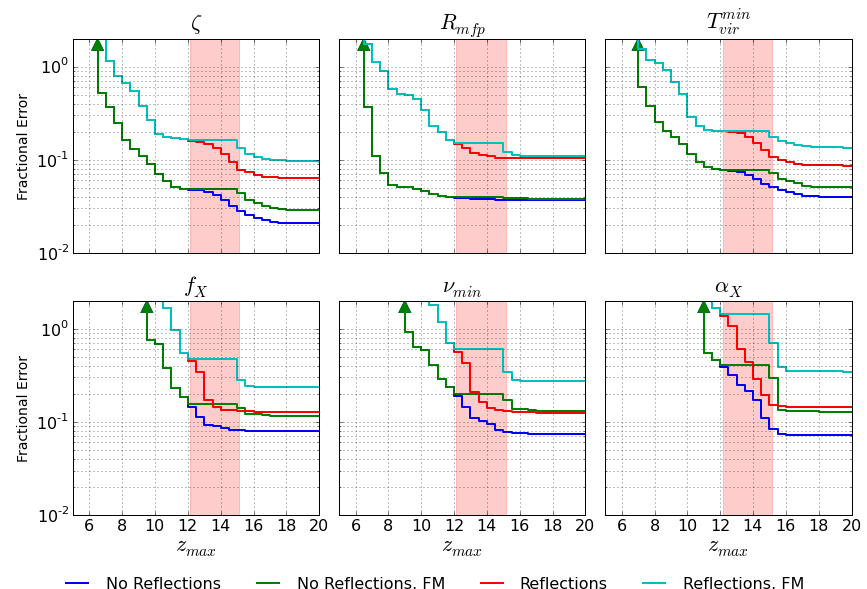

In [39]:
zax,errs=computeErrorsZ(params,'mod','hera331','DEFAULT',noFM=False)
_,errsNoFM=computeErrorsZ(params,'mod','hera331','DEFAULT',noFM=True)
_,errsLD=computeErrorsZ(params,'mod','hera331','LARGEDELAY',noFM=False)
_,errsNoFMLD=computeErrorsZ(params,'mod','hera331','LARGEDELAY',noFM=True)
errs[errs>1.]=9e99
errsNoFM[errsNoFM>1.]=9e99
fig,axarr=plt.subplots(2,3,sharex=True,sharey=True)
lw=2
lines=[0,0,0,0]
llabels=[0,0,0,0]
ymin=1e-2
ymax=2e0
for ii in range(3):
    for jj in range(2):
        mm=jj*3+ii
        param=params[mm]
        lss=['-','-']
        z1Min1=zax[errs[:,mm]==9e99].max()
        zlMin2=zax[errsNoFM[:,mm]==9e99].max()        
        l1=axarr[jj][ii].step(np.hstack([zax,[zax[-1]+.5]])[1:],errs[:,mm],ls=lss[0],lw=lw)[0]
        l2=axarr[jj][ii].step(np.hstack([zax,[zax[-1]+.5]])[1:],errsNoFM[:,mm],ls=lss[1],lw=lw)[0]
        l3=axarr[jj][ii].step(np.hstack([zax,[zax[-1]+.5]])[1:],errsLD[:,mm],ls=lss[0],lw=lw)[0]
        l4=axarr[jj][ii].step(np.hstack([zax,[zax[-1]+.5]])[1:],errsNoFMLD[:,mm],ls=lss[1],lw=lw)[0]
        axarr[jj][ii].annotate("",xy=(zax[-1]-1,errs[-2,mm]),xytext=(zax[-1]-1,errsNoFM[-2,mm]),xycoords='data',textcoords='data',arrowprops=dict(arrowstyle='<->'))
        axarr[jj][ii].set_title('%s'%(labels[param]),fontsize=22,y=1.02)
        axarr[jj][ii].set_ylim(ymin,ymax)
        axarr[jj][ii].set_xlim(5,20)
        axarr[jj][ii].arrow(zlMin2+.5,1.,0,.5,head_width=0.7, head_length=.5,fc='b',ec='b')
        axarr[jj][ii].arrow(z1Min1+.5,1.,0,.5,head_width=0.7, head_length=.5,fc='g',ec='g')
        axarr[jj][ii].grid(b=True,which='minor')
        axarr[jj][ii].grid(b=True,which='major')
        axarr[jj][ii].set_yscale('log')
        axarr[jj][ii].tick_params('x',labelsize=16)
        axarr[jj][ii].tick_params('y',labelsize=16)
        zL=1420./108.-1.
        zH=1420./88.-1.
        dZ=zH-zL
        p=patches.Rectangle((zL,1e-2),dZ,ymax-ymin,color='r',alpha=.2)
        axarr[jj][ii].add_patch(p)
print lines
print llabels
lgd=fig.legend( (l1,l2,l3,l4), ('No Reflections','No Reflections, FM','Reflections','Reflections, FM'), loc = 'lower center', ncol=5, labelspacing=0.,fontsize=16,bbox_to_anchor=(.5,-.03))
#plt.legend(loc='best')
lgd.draw_frame(False)
axarr[0][0].set_ylabel('Fractional Error',fontsize=14)
axarr[1][0].set_ylabel('Fractional Error',fontsize=14)
axarr[1][0].set_xlabel('$z_{max}$',fontsize=22)
axarr[1][1].set_xlabel('$z_{max}$',fontsize=22)
axarr[1][2].set_xlabel('$z_{max}$',fontsize=22)
#plt.gcf().arrange_subplots(top=.9,bottom=.1,right=.9,left=.1)
plt.gcf().set_size_inches([12,8])
plt.tight_layout()
plt.savefig('../paper/figures/sigmaVsZ.pdf',bbox_inches='tight')

param=HII_EFF_FACTOR
param=R_BUBBLE_MAX
param=X_RAY_Tvir_MIN
param=ZETA_X
param=NU_X_THRESH
param=X_RAY_SPEC_INDEX
a=0.27,b=45.44,theta=-0.01
a=0.43,b=0.58,theta=-0.34
a=45.44,b=0.57,theta=0.00
param=HII_EFF_FACTOR
param=R_BUBBLE_MAX
param=X_RAY_Tvir_MIN
param=ZETA_X
param=NU_X_THRESH
param=X_RAY_SPEC_INDEX
full
a=0.13,b=0.26,theta=0.34
a=0.07,b=0.24,theta=-0.60
a=0.25,b=0.19,theta=0.35
param=HII_EFF_FACTOR
param=R_BUBBLE_MAX
param=X_RAY_Tvir_MIN
param=ZETA_X
param=NU_X_THRESH
param=X_RAY_SPEC_INDEX
full
a=0.17,b=0.10,theta=0.36
a=0.04,b=0.32,theta=-0.54
a=0.09,b=0.28,theta=-0.26


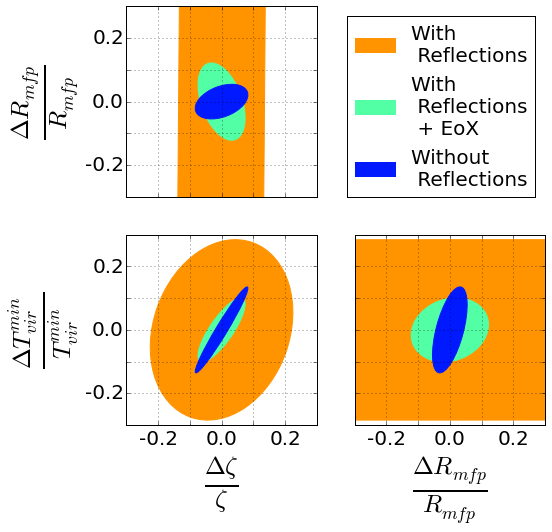

In [45]:




_,covFull,_=computeCovariances(params,'hera331','LARGEDELAY','mod',10,25,8,noFM=False)
covFull=covFull[:3,:3]
gs=gridspec.GridSpec(covFull.shape[0]-1,covFull.shape[1]-1)
ticks=[-.3,-.2,-.1,0.,.1,.2,.3]
tickLabels=['','-0.2','','0.0','','0.2','']
tickLabelsEmpty=['','','','','','','']
lims=(-.3,.3)
cm=plt.get_cmap('jet')
c3=cm(.15)
c2=cm(.45)
c1=cm(.75)
yTicks=[]
axarr=[[0 for mm in range(covFull.shape[0])] for nn in range(covFull.shape[0])]

for ii in range(1,covFull.shape[0]):
    for jj in range(0,ii):
        #print ii,jj
        ax=plt.subplot(gs[ii-1,jj])
        axarr[ii][jj]=ax
        cov=np.zeros((2,2))
        cov[0,0]=covFull[jj,jj]
        cov[1,1]=covFull[ii,ii]
        cov[0,1]=covFull[jj,ii]
        cov[1,0]=covFull[jj,ii]
        eigval,eigvec=np.linalg.eig(cov)
        a=np.sqrt(5.59*eigval[0])
        b=np.sqrt(5.59*eigval[1])
        theta=np.arctan(eigvec[1,0]/eigvec[0,0])
        print 'a=%.2f,b=%.2f,theta=%.2f'%(a,b,theta)
        ell=matplotlib.patches.Ellipse(xy=[0.,0.],width=a,height=b,angle=theta*180./np.pi)
        ax.set_xlim(lims)
        ax.set_ylim(lims)
        ax.add_artist(ell)
        ell.set_clip_box(ax.bbox)
        ell.set_facecolor(c1)
        ell.set_edgecolor(c1)
        ell.set_alpha(1.)
        patch1=ell
        #ell.set_facecolor('none')
        #ell.set_edgecolor('k')
        if(jj==0):
            ax.set_ylabel('$\\frac{\\Delta %s}{%s}$'%(labelsMath[params[ii]],labelsMath[params[ii]]),fontsize=36)
        if(ii==covFull.shape[0]-1):
            ax.set_xlabel('$\\frac{\\Delta %s}{%s}$'%(labelsMath[params[jj]],labelsMath[params[jj]]),fontsize=36)
        
        if(ii==covFull.shape[0]-1):
            ax.set_xticklabels(tickLabels)
        else:
            ax.set_xticklabels(tickLabelsEmpty)
        if(jj==0):
            ax.set_yticklabels(tickLabels)
        else:
            ax.set_yticklabels(tickLabelsEmpty)
        plt.grid()
            
_,covFull,_=computeCovariances(params,'hera331','LARGEDELAY','mod',4.5,25,8,noFM=False)
covFull=covFull[:3,:3]
print 'full'
for ii in range(1,covFull.shape[0]):
    for jj in range(0,ii):
        #print ii,jj
        ax=axarr[ii][jj]
        cov=np.zeros((2,2))
        cov[0,0]=covFull[jj,jj]
        cov[1,1]=covFull[ii,ii]
        cov[0,1]=covFull[jj,ii]
        cov[1,0]=covFull[jj,ii]
        eigval,eigvec=np.linalg.eig(cov)
        a=np.sqrt(5.59*eigval[0])
        b=np.sqrt(5.59*eigval[1])
        theta=np.arctan(eigvec[1,0]/eigvec[0,0])
        print 'a=%.2f,b=%.2f,theta=%.2f'%(a,b,theta)
        ell=matplotlib.patches.Ellipse(xy=[0.,0.],width=a,height=b,angle=theta*180./np.pi)
        ax.set_xlim(lims)
        ax.set_ylim(lims)
        ax.set_xticks(ticks)
        ax.set_yticks(ticks)
        ax.add_artist(ell)
        ax.tick_params('x',labelsize=20)
        ax.tick_params('y',labelsize=20)
        ax.grid()
        ell.set_clip_box(ax.bbox)
        ell.set_facecolor(c2)
        ell.set_edgecolor(c2)
        ell.set_alpha(1.0)
        patch2=ell
        plt.grid()


_,covFull,_=computeCovariances(params,'hera331','DEFAULT','mod',4.5,10,8,noFM=False)
covFull=covFull[:3,:3]
print 'full'
for ii in range(1,covFull.shape[0]):
    for jj in range(0,ii):
        #print ii,jj
        ax=axarr[ii][jj]
        cov=np.zeros((2,2))
        cov[0,0]=covFull[jj,jj]
        cov[1,1]=covFull[ii,ii]
        cov[0,1]=covFull[jj,ii]
        cov[1,0]=covFull[jj,ii]
        eigval,eigvec=np.linalg.eig(cov)
        a=np.sqrt(5.59*eigval[0])
        b=np.sqrt(5.59*eigval[1])
        theta=np.arctan(eigvec[1,0]/eigvec[0,0])
        print 'a=%.2f,b=%.2f,theta=%.2f'%(a,b,theta)
        ell=matplotlib.patches.Ellipse(xy=[0.,0.],width=a,height=b,angle=theta*180./np.pi)
        ax.set_xlim(lims)
        ax.set_ylim(lims)
        ax.set_xticks(ticks)
        ax.set_yticks(ticks)
        ax.add_artist(ell)
        ax.tick_params('x',labelsize=20)
        ax.tick_params('y',labelsize=20)
        ax.grid()
        ell.set_clip_box(ax.bbox)
        ell.set_facecolor(c3)
        ell.set_edgecolor(c3)
        ell.set_alpha(1.0)
        patch3=ell
        #ell.set_facecolor('none')
        #ell.set_edgecolor('k')        
        #ax.set_xlabel(labels[params[ii]])
        #ax.set_ylabel(labels[params[jj]])
        plt.grid()
axarr[1][0].legend((patch1,patch2,patch3),('With \n Reflections','With \n Reflections \n + EoX','Without \n Reflections'),'upper right',fontsize=20,bbox_to_anchor=(2.2,1))
plt.gcf().set_size_inches(7.5,7.5)
plt.savefig('../paper/figures/reionization_triangle_compare.pdf',bbox_inches='tight')

param=HII_EFF_FACTOR
param=R_BUBBLE_MAX
param=X_RAY_Tvir_MIN
param=ZETA_X
param=NU_X_THRESH
param=X_RAY_SPEC_INDEX
(6, 6)
a=0.13,b=0.26,theta=0.34
a=0.07,b=0.24,theta=-0.60
a=0.25,b=0.19,theta=0.35
a=0.14,b=0.30,theta=0.13
a=0.24,b=0.31,theta=-0.28
a=0.20,b=0.30,theta=0.11
a=0.13,b=0.30,theta=-0.27
a=0.24,b=0.30,theta=-0.25
a=0.16,b=0.32,theta=-0.46
a=0.40,b=0.13,theta=-0.78
a=0.15,b=0.34,theta=-0.05
a=0.24,b=0.34,theta=-0.22
a=0.20,b=0.34,theta=-0.16
a=0.18,b=0.41,theta=0.70
a=0.12,b=0.43,theta=-0.71
param=HII_EFF_FACTOR
param=R_BUBBLE_MAX
param=X_RAY_Tvir_MIN
param=ZETA_X
param=NU_X_THRESH
param=X_RAY_SPEC_INDEX
a=0.05,b=0.09,theta=-0.01
a=0.03,b=0.10,theta=-0.42
a=0.06,b=0.12,theta=-0.71
a=0.05,b=0.19,theta=0.05
a=0.08,b=0.19,theta=-0.21
a=0.09,b=0.19,theta=-0.10
a=0.04,b=0.18,theta=-0.17
a=0.09,b=0.17,theta=-0.05
a=0.08,b=0.18,theta=-0.29
a=0.24,b=0.08,theta=-0.74
a=0.04,b=0.17,theta=-0.14
a=0.09,b=0.17,theta=-0.04
a=0.09,b=0.17,theta=-0.24
a=0.24,b=0.09,theta=-0.72
a=0.24,b=0.04,t

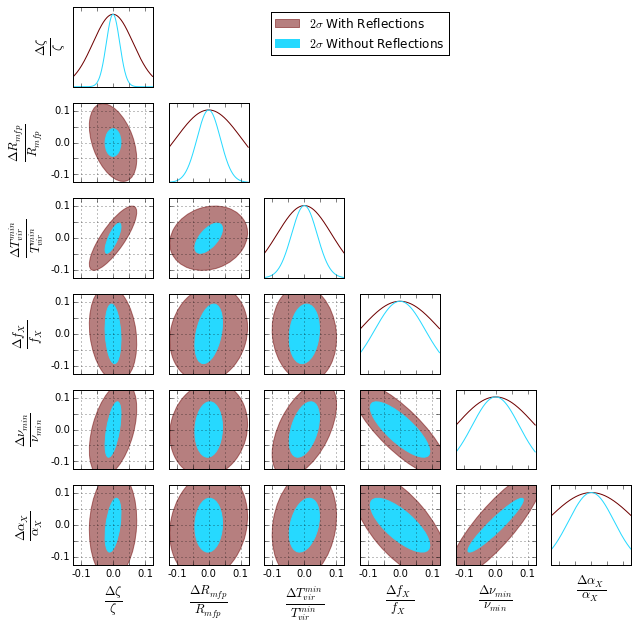

In [43]:
_,covFull,_=computeCovariances(params,'hera331','LARGEDELAY','mod',4.5,25,8,noFM=False)
#draw 10,000 trials 
#samples=np.random.multivariate_normal(np.zeros(len(params)),covFull,1000) 
gs=gridspec.GridSpec(covFull.shape[0],covFull.shape[1])
ticks=[-.1,-.05,0.,.05,.1]
tickLabels=['-0.1','','0.0','','0.1']
tickLabelsEmpty=['','','','','','','']
cm=plt.get_cmap('hot')
c1=cm(.15)
cm=plt.get_cmap('cool')
c2=cm(.15)
yTicks=[]
lims=(-.125,.125)
print covFull.shape
axarr=[[0 for mm in range(covFull.shape[0])] for nn in range(covFull.shape[0])]
for ii in range(0,covFull.shape[0]):
    ax=plt.subplot(gs[ii,ii])
    x=np.arange(lims[0],lims[1],1e-3)
    stdi=np.sqrt(covFull[ii,ii])
    y=np.exp(-x**2./(2.*stdi**2.))#*1./np.sqrt(2.*np.pi*stdi)
    ax.plot(x,y,color=c1)
for ii in range(1,covFull.shape[0]):
    for jj in range(0,ii):
        #print ii,jj
        ax=plt.subplot(gs[ii,jj])
        axarr[ii][jj]=ax
        cov=np.zeros((2,2))
        cov[0,0]=covFull[jj,jj]
        cov[1,1]=covFull[ii,ii]
        cov[0,1]=covFull[jj,ii]
        cov[1,0]=covFull[jj,ii]
        eigval,eigvec=np.linalg.eig(cov)
        a=np.sqrt(5.59*eigval[0])
        b=np.sqrt(5.59*eigval[1])
        theta=np.arctan(eigvec[1,0]/eigvec[0,0])
        print 'a=%.2f,b=%.2f,theta=%.2f'%(a,b,theta)
        ell=matplotlib.patches.Ellipse(xy=[0.,0.],width=a,height=b,angle=theta*180./np.pi)
        ell.set_facecolor(c1)
        ell.set_edgecolor(c1)
        ell.set_alpha(.5)
        ax.set_xlim(lims)
        ax.set_ylim(lims)
        #plt.scatter(samples[:,jj],samples[:,ii],s=1,alpha=.2)
        ax.add_artist(ell)
        ell.set_clip_box(ax.bbox)
        patch1=ell
        #ell.set_facecolor('none')
        #ell.set_edgecolor('r')
        if(jj==0):
            ax.set_ylabel('$\\frac{\\Delta %s}{%s}$'%(labelsMath[params[ii]],labelsMath[params[ii]]),fontsize=18)
        if(ii==covFull.shape[0]-1):
            ax.set_xlabel('$\\frac{\\Delta %s}{%s}$'%(labelsMath[params[jj]],labelsMath[params[jj]]),fontsize=18)
        
        if(ii==covFull.shape[0]-1):
            ax.set_xticklabels(tickLabels)
        else:
            ax.set_xticklabels(tickLabelsEmpty)
        if(jj==0):
            ax.set_yticklabels(tickLabels)
        else:
            ax.set_yticklabels(tickLabelsEmpty)
            
            
_,covFull,_=computeCovariances(params,'hera331','DEFAULT','mod',4.5,25,8,noFM=False)
#samples=np.random.multivariate_normal(np.zeros(len(params)),covFull,1000) 
for ii in range(0,covFull.shape[0]):
    ax=plt.subplot(gs[ii,ii])
    x=np.arange(lims[0],lims[1],1e-3)
    stdi=np.sqrt(covFull[ii,ii])
    y=np.exp(-x**2./(2.*stdi**2.))#*1./np.sqrt(2.*np.pi*stdi)
    ax.plot(x,y,color=c2)
    ax.set_ylim(0,1.1)
    ax.set_xlim(lims)
    if(ii==covFull.shape[0]-1):
        ax.set_yticks([])
        ax.set_xticks(ticks)
        ax.set_xticklabels(tickLabelsEmpty)
        ax.set_xlabel('$\\frac{\\Delta %s}{%s}$'%(labelsMath[params[ii]],labelsMath[params[ii]]),fontsize=18)
    else:
        ax.set_xticks(ticks)
        ax.set_xticklabels(tickLabelsEmpty)
        ax.set_yticks([])
    if((ii==0)):
        ax.set_ylabel('$\\frac{\\Delta %s}{%s}$'%(labelsMath[params[ii]],labelsMath[params[ii]]),fontsize=18)

    
for ii in range(1,covFull.shape[0]):
    for jj in range(0,ii):
        #print ii,jj
        ax=axarr[ii][jj]
        cov=np.zeros((2,2))
        cov[0,0]=covFull[jj,jj]
        cov[1,1]=covFull[ii,ii]
        cov[0,1]=covFull[jj,ii]
        cov[1,0]=covFull[jj,ii]
        eigval,eigvec=np.linalg.eig(cov)
        a=np.sqrt(5.59*eigval[0])
        b=np.sqrt(5.59*eigval[1])
        theta=np.arctan(eigvec[1,0]/eigvec[0,0])
        print 'a=%.2f,b=%.2f,theta=%.2f'%(a,b,theta)
        ell=matplotlib.patches.Ellipse(xy=[0.,0.],width=a,height=b,angle=theta*180./np.pi)
        ell.set_alpha(1.)
        ell.set_facecolor(c2)
        ell.set_edgecolor(c2)
        ax.set_xlim(lims)
        ax.set_ylim(lims)
        ax.set_xticks(ticks)
        ax.set_yticks(ticks)
        ax.add_artist(ell)
        ax.grid()
        #ax.scatter(samples[:,jj],samples[:,ii],s=.1,alpha=.1)
        ell.set_clip_box(ax.bbox)
        patch2=ell
        #ell.set_facecolor('none')
        #ell.set_edgecolor('r')        
        #ax.set_xlabel(labels[params[ii]])
        #ax.set_ylabel(labels[params[jj]])
plt.gcf().set_size_inches(10,10)
plt.gcf().legend((patch1,patch2),('$2\\sigma$ With Reflections','$2\\sigma$ Without Reflections'),'lower center',ncol=1,bbox_to_anchor=(.5,.79))#loc=(.6,.75),fontsize=16)
plt.savefig('../paper/figures/triangle_hera331.pdf',bbox_inches='tight')


